#### 시계열데이터
- type
    - 년도 표시(4자리수) : %Y
    - 년도 표시(2자리수) : %y
    - 월을 숫자로 표시 : %m
    - 월의 이름을 표시 : %B
    - 월의 이름 축약 표시 : %b
    - 일을 숫자로 표시 : %d
    - 시를 24시 기준으로 표시 : %H
    - 시를 12시 기준으로 표시 : %I
    - AM/PM을 표시 : %p
    - 분을 숫자로 표시 : %M
    - 초를 숫자로 표시 : %S
    - 요일을 이름으로 표시 : %A
    - 요일을 이름 축약 표시 : %a
    - 요일을 숫자로 표시 : %w (0:일, ..., 6:토)

In [1]:
from datetime import datetime

In [2]:
time_text = '2025-03-07'

In [4]:
type(time_text)

str

In [11]:
time_data = datetime.strptime(time_text, '%Y-%m-%d')
print(time_data)
print(time_text)

2025-03-07 00:00:00
2025-03-07


In [12]:
type(time_data)

datetime.datetime

In [18]:
#시계열 데이터를 문자열 데이터로 변경
time_data.strftime('%y/%m/%d')

'25/03/07'

In [19]:
time_data.strftime('%m월')

'03월'

In [21]:
#요일
time_data.strftime('%w')

'5'

In [22]:
time_data.strftime('%A')

'Friday'

In [23]:
time_data.strftime('%a')

'Fri'

In [25]:
import pandas as pd

In [32]:
#pandas에서 제공하는 시계열 데이터
pd.Timestamp(0)     #나노초 단위로 시간 구성

Timestamp('1970-01-01 00:00:00')

In [33]:
pd.Timestamp(100, unit='D') # 1970년부터 100일 뒤

Timestamp('1970-04-11 00:00:00')

In [35]:
pd.Timestamp('2025-03-07')

Timestamp('2025-03-07 00:00:00')

In [36]:
pd.Timestamp('25-03-07')

Timestamp('2007-03-25 00:00:00')

In [37]:
pd.Timestamp('98-03-07')

Timestamp('1998-03-07 00:00:00')

In [39]:
pd.Timestamp('2016-01')

Timestamp('2016-01-01 00:00:00')

In [41]:
pd.to_datetime('2025-03-07')

Timestamp('2025-03-07 00:00:00')

In [46]:
time_data2 = pd.to_datetime('2025년 03월 07일', format = '%Y년 %m월 %d일')

In [48]:
time_data3 = pd.Timestamp(1, unit ='D')

In [51]:
time_data2 - time_data3

Timedelta('20153 days 00:00:00')

In [52]:
pd.Timedelta('3 days')

Timedelta('3 days 00:00:00')

In [53]:
time_data2 - pd.Timedelta('3 days')

Timestamp('2025-03-04 00:00:00')

In [ ]:
pd.Timedelta(days=40) #달이 없어서 60일은 2달 이런식으로 해야함.

Timedelta('40 days 00:00:00')

#### 코로나 데이터를 활용하여 일일 확진자가 가장 많은 요일 찾기
- 기준일과 총확진자 컬럼 추출 ( 그 외 컬럼 drop())
- stateDt를 기준으로 정렬 후, 인덱스 재정렬
- 일일 확진자 파생변수 생성
- 일일확진자가 음수인 경우가 있는지 확인

In [57]:
import pandas as pd
from datetime import datetime

In [88]:
corona = pd.read_csv('../csv/corona.csv')

In [89]:
corona.head()

,Unnamed: 0,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN
1,1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN
2,2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN
3,3,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN
4,4,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN


In [102]:
#사용할 컬럼만 추출하여 변수에 저장
df = corona[['stateDt','decideCnt']]
df2 = corona[['stateDt','decideCnt']]

In [103]:
#stateDt를 기준으로 정렬 후, 인덱스 재정렬
df.sort_values('stateDt',inplace=True)
df.reset_index(drop=True,inplace=True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_7324\1517279511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values('stateDt',inplace=True)


In [104]:
df.head()

,stateDt,decideCnt
0,20200310,7513
1,20200311,7755
2,20200312,7869
3,20200313,7979
4,20200314,8086


In [105]:
df['decideCnt'].shift()

0             NaN
1          7513.0
2          7755.0
3          7869.0
4          7979.0
          ...    
815    18141775.0
816    18153814.0
817    18163648.0
818    18168670.0
819    18174842.0
Name: decideCnt, Length: 820, dtype: float64

In [108]:
#일일 확진자 파생변수 생성
df['일일확진자'] = (df['decideCnt']-df['decideCnt'].shift()).fillna(0)

C:\Users\Owner\AppData\Local\Temp\ipykernel_7324\2367934821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['일일확진자'] = (df['decideCnt']-df['decideCnt'].shift()).fillna(0)


In [ ]:
# 일일확진자가 음수인 경우가 있는지 확인
df.describe()

,stateDt,decideCnt,일일확진자
count,8.200000e+02,8.200000e+02,820.000000
mean,2.020897e+07,1.913097e+06,22171.569512
std,7.118265e+03,4.857030e+06,71013.844067
min,2.020031e+07,7.513000e+03,0.000000
25%,2.020100e+07,2.393525e+04,125.000000
50%,2.021042e+07,1.185640e+05,634.000000
75%,2.021112e+07,3.979915e+05,2782.750000
max,2.022061e+07,1.818820e+07,621204.000000


In [114]:
df.loc[df['일일확진자']<0]

,stateDt,decideCnt,일일확진자


In [118]:
df.head()

,stateDt,decideCnt,일일확진자
0,20200310,7513,0.0
1,20200311,7755,242.0
2,20200312,7869,114.0
3,20200313,7979,110.0
4,20200314,8086,107.0


In [121]:
#기준일 데이터가 내림차순일 때
df2['일일확진자'] = df2['decideCnt'].diff(-1).fillna(0)

C:\Users\Owner\AppData\Local\Temp\ipykernel_7324\2575296249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['일일확진자'] = df2['decideCnt'].diff(-1).fillna(0)


In [122]:
df2.head()

,stateDt,decideCnt,일일확진자
0,20220608,18188200,13358.0
1,20220607,18174842,6172.0
2,20220606,18168670,5022.0
3,20220605,18163648,9834.0
4,20220604,18153814,12039.0


In [123]:
df2['일일확진자'].describe() == df['일일확진자'].describe()

count    True
mean     True
std      True
min      True
25%      True
50%      True
75%      True
max      True
Name: 일일확진자, dtype: bool

In [130]:
#기준일 데이터를 시계열데이터로 변경
#df.info()
df['stateDt'] =\
    pd.to_datetime(df['stateDt'], format ='%Y%m%d')

C:\Users\Owner\AppData\Local\Temp\ipykernel_7324\1915785415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stateDt'] =\


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   stateDt    820 non-null    datetime64[ns]
 1   decideCnt  820 non-null    int64         
 2   일일확진자      820 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 19.3 KB


In [141]:
df.loc[0,'stateDt']

Timestamp('2020-03-10 00:00:00')

In [ ]:
#반복문을 이용해서 시계열 데이터의 요일을 출력하는 방법
week_list = []
#for i in range(len(df)):
for i in df.index:
    week_data = datetime.strftime(df.loc[i,'stateDt'],format='%A')
    week_list.append(week_data)
week_list

In [149]:
# map(), lambda()
list1 = [10,20,30,40]

#for i in list1:
#print(i)
list(map(
    lambda x: x,
    list1
))

[10, 20, 30, 40]

In [151]:
#list1 데이터에서 값이 25 미만이면 'a' 25이상이면 'b' 변경하는 방법
res=[]
for i in list1:
    #i : list1에 각 원소들
    if i <25:
        res.append('a')
    else :
        res.append('b')
res

['a', 'a', 'b', 'b']

In [152]:
#일반함수 + map()
def func_1(x):
    if x< 25:
        return 'a'
    else:
        return 'b'
    
list(
    map(
        func_1,
        list1
    )
)

['a', 'a', 'b', 'b']

In [158]:
list(
    map(
        lambda x : 'a' if x<25 else 'b',
        list1
    )
)

['a', 'a', 'b', 'b']

In [164]:
df['요일'] = \
    df['stateDt'].map(
    lambda x : x.strftime('%w')
)

C:\Users\Owner\AppData\Local\Temp\ipykernel_7324\3785938826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['요일'] = \


In [165]:
df['요일']

0      2
1      3
2      4
3      5
4      6
      ..
815    6
816    0
817    1
818    2
819    3
Name: 요일, Length: 820, dtype: object

In [168]:
df.head()

,stateDt,decideCnt,일일확진자,요일
0,2020-03-10,7513,0.0,2
1,2020-03-11,7755,242.0,3
2,2020-03-12,7869,114.0,4
3,2020-03-13,7979,110.0,5
4,2020-03-14,8086,107.0,6


In [215]:
for_df = df.copy()

In [214]:
for_df.loc[:,'요일']

0      화요일
1      수요일
2      목요일
3      금요일
4      토요일
      ... 
815    토요일
816    일요일
817    월요일
818    화요일
819    수요일
Name: 요일, Length: 820, dtype: object

In [225]:
#요일 컬럼의 데이터를 숫자형태에서 문자형태(월,...,일)변경
#for
# for i in range(len(for_df['요일'])):
#     if(for_df['요일'][i]=='0'):
#         for_df['요일'][i] = '일'
#     elif(for_df['요일'][i]=='1'):
#         for_df['요일'][i] = '월'
#     elif(for_df['요일'][i]=='2'):
#         for_df['요일'][i] ='화'
#     elif(for_df['요일'][i]=='3'):
#         for_df['요일'][i] ='수'
#     elif(for_df['요일'][i]=='4'):
#         for_df['요일'][i] ='목'
#     elif(for_df['요일'][i]=='5'):
#         for_df['요일'][i] ='금'
#     elif(for_df['요일'][i]=='6'):
#         for_df['요일'][i] ='토'
# for_df
        
#while
#딕셔너리 생성
dict_week = {
    '0':'일',
    '1':'월',
    '2':'화',
    '3':'수',
    '4':'목',
    '5':'금',
    '6':'토'
}
i = 0
week_list2 = []
while(i<len(for_df)):
    week_list2.append(dict_week[for_df.iloc[i,-1]])
    i += 1
week_list2
        

#map + 일반함수
def change_week(x):
    return dict_week[x]
    
for_df['요일'].map(
    change_week
)


#map + lambda
week_list = ['일','월','화','수','목','금','토']
df['요일']= for_df['요일'].map(
    lambda x : week_list[int(x)]
)

C:\Users\Owner\AppData\Local\Temp\ipykernel_7324\4137360614.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['요일']= for_df['요일'].map(


In [235]:
df.drop(
    0,
    axis = 0,
    inplace=True
)

C:\Users\Owner\AppData\Local\Temp\ipykernel_7324\716023301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(


In [262]:
#0번 일일확진자 값은 비교군이 없었기에 0
#그래서 제거
group_data=df.groupby('요일')[['일일확진자']].agg(['mean'])

In [257]:
df.groupby('요일')[['일일확진자']].agg(['sum','mean']).rank(ascending=0).sort_values(('일일확진자', 'mean'),inplace=True)

In [258]:
import matplotlib.pyplot as plt

In [264]:
#폰트 설정
import platform

In [265]:
platform.system()

'Windows'

In [267]:
if platform.system() =='Darwin':
    plt.rc('font',family = 'AppleGothic')
else:
    plt.rc('font',family = 'Malgun Gothic')

<Axes: xlabel='요일'>

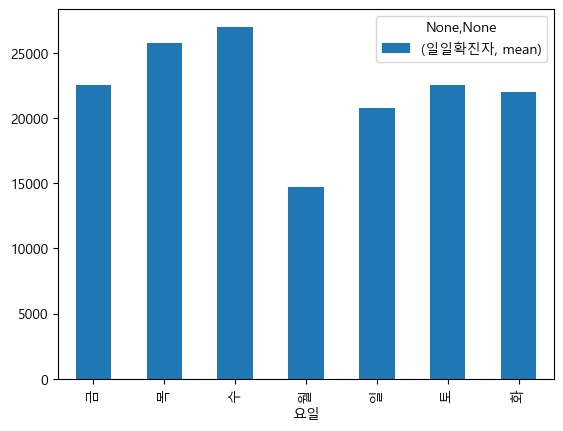

In [ ]:
#그래프 시각화 과정에서 한글이 출력에서 문제 발생
#해당 문제 해결하기 위해 상단 코드 실행.
group_data.plot(kind='bar')